In [236]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

In [237]:
#load data set and randomize it and save it new file
auto_mpg_df = pd.read_table('auto-mpg.data-original.csv', delimiter=',').dropna().sample(frac=1) #.reset_index(drop=True)
#auto_mpg_df.to_csv('auto-mpg.data-original2.csv')
auto_mpg_df.head()

,MPG,Cylinders,Displacement,horsepower,Weight,Acceleration,Model_Year,Origin,Car Name
255,36.1,4,91.0,60.0,1800,16.4,78,3,honda civic cvcc
316,41.5,4,98.0,76.0,2144,14.7,80,2,vw rabbit
154,24.0,4,90.0,75.0,2108,15.5,74,2,fiat 128
351,39.0,4,86.0,64.0,1875,16.4,81,1,plymouth champ
356,34.1,4,91.0,68.0,1985,16.0,81,3,mazda glc 4


In [238]:
#load the randomized data in pandas dataframe
auto_mpg_df = pd.read_table('auto-mpg.data-original2.csv', delimiter=',')
auto_mpg_df = auto_mpg_df.drop('Unnamed: 0', 1)
auto_mpg_df.head()

,MPG,Cylinders,Displacement,horsepower,Weight,Acceleration,Model_Year,Origin,Car Name
0,12.0,8,400.0,167.0,4906,12.5,73,1,ford country
1,28.0,4,116.0,90.0,2123,14.0,71,2,opel 1900
2,39.4,4,85.0,70.0,2070,18.6,78,3,datsun b210 gx
3,23.8,4,151.0,85.0,2855,17.6,78,1,oldsmobile starfire sx
4,23.0,4,140.0,78.0,2592,18.5,75,1,pontiac astro


In [239]:
#Name the Origin of the cars for graphing porpuse, will not be used for analysis
Origin = pd.DataFrame(auto_mpg_df['Origin'].where(auto_mpg_df['Origin'] != 1, 'North America'))
Origin = Origin.where(Origin != 2, 'Europe')
Origin = Origin.where(Origin != 3, 'Asia')
auto_mpg_df2 = auto_mpg_df.drop('Cylinders', 1)
auto_mpg_df2['Origin'] = Origin 

#Exploratory look at relationship between all the variable, except for 'Car Name'
sns.pairplot(auto_mpg_df2, kind='scatter', hue='Origin', plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.savefig('autompg_expolatory.png', bbox_inches='tight')
plt.show()

In [240]:
#Removing outliers and creating new feature
auto_mpg_df = auto_mpg_df.drop([121, 129, 204])
auto_mpg_df['Engin'] = auto_mpg_df['Displacement'] * auto_mpg_df['Cylinders']

In [241]:
#applying a non-linear transformation function to features
auto_mpg_df['Displacement'] = np.log(auto_mpg_df['Displacement'])
auto_mpg_df['Weight'] = np.log(auto_mpg_df['Weight'])
auto_mpg_df['MPG'] = np.log(auto_mpg_df['MPG'])
auto_mpg_df['Engin'] = np.log(auto_mpg_df['Engin'])
auto_mpg_df['horsepower'] = np.log(auto_mpg_df['horsepower'])

#head map with corrilation value within
plt.subplots(figsize=(25,20)) 
sns.heatmap(auto_mpg_df.corr(), annot=True, vmin=0, vmax=1)
#plt.savefig('corrheatmap.png', bbox_inches='tight')
plt.show()

In [242]:
#Drop all the cylinder 3 and 5 data because we don't have enough of them to make good prediction for them
cy5 = auto_mpg_df[auto_mpg_df['Cylinders'] == 5]
cy3 = auto_mpg_df[auto_mpg_df['Cylinders'] == 3]

cytodrop = pd.concat([cy3, cy5])
cyindex = cytodrop.index.values
auto_mpg_df = auto_mpg_df.drop(cyindex)

In [243]:
# Create a set of dummy variables from the sex variable
df_Cylinders = pd.get_dummies(auto_mpg_df['Cylinders'])
df_Origin = pd.get_dummies(auto_mpg_df['Origin'])

# Join the dummy variables to the main dataframe
auto_mpg_df = pd.concat([auto_mpg_df, df_Cylinders, df_Origin], axis=1)
auto_mpg_df = auto_mpg_df.drop(['Cylinders', 'Origin', 'Car Name'], 1)
auto_mpg_df.head()

,MPG,Displacement,horsepower,Weight,Acceleration,Model_Year,Engin,4,6,8,1,2,3
0,2.484907,5.991465,5.117994,8.498214,12.5,73,8.070906,0,0,1,1,0,0
1,3.332205,4.753590,4.499810,7.660585,14.0,71,6.139885,1,0,0,0,1,0
2,3.673766,4.442651,4.248495,7.635304,18.6,78,5.828946,1,0,0,0,0,1
3,3.169686,5.017280,4.442651,7.956827,17.6,78,6.403574,1,0,0,1,0,0
4,3.135494,4.941642,4.356709,7.860185,18.5,75,6.327937,1,0,0,1,0,0


In [244]:
#Create input and outcome variable
X = auto_mpg_df.drop('MPG', 1)
y = auto_mpg_df['MPG']

#Split the input and outcome into, train and test dataset for analysis
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=20)

# OLS regression

In [249]:
#Ordernary least squre regression, the simples regression
regr = linear_model.LinearRegression()
regr.fit(X_train2, y_train2)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_test2, y_test2))

#cross validation to check for overfitting, can be done using 
k = cross_val_score(regr, X, y, cv=5)
k.sort()
print('\n mean r2')
print(np.mean(k))
k


Coefficients: 
 [ 0.0297048  -0.30296936 -0.5566719  -0.01409471  0.0290789  -0.00069067
  0.05606461 -0.0294268  -0.02663781 -0.03363767  0.00908612  0.02455155]

Intercept: 
 6.78246602155

R-squared:
0.890862869747

 mean r2
0.895635208399


array([ 0.87474484,  0.89351222,  0.8939914 ,  0.90178908,  0.91413849])

In [247]:
#check variablity of the crossvalidation result, high variablity mean overfitting
max(k) -min(k)

0.03939365078594137

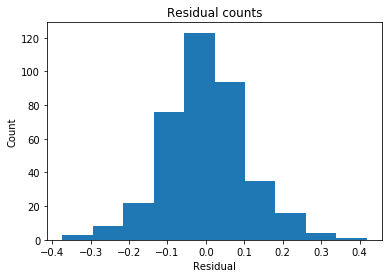

In [248]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = y

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning. Linear regression assumes normal distripution
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

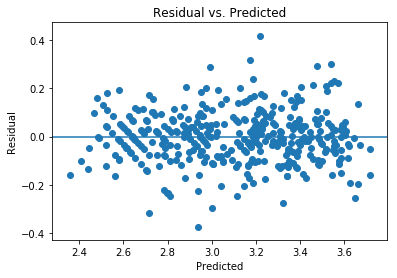

0.79215241134


In [215]:
#Linear regression assumes consistend distribution, inconsisted distribution could cause over confidence in result
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()
print(max(residual)-min(residual))

# Lasso regression

In [250]:
lass = linear_model.Lasso(alpha=0.001145)
lass.fit(X_train2, y_train2)

print('R² for the model with few features:')
print(lass.score(X_test2, y_test2))
origparams = np.append(lass.coef_, lass.intercept_)
print('\nParameter estimates for the model with few features:')
print(str(origparams) + '\n')

k = cross_val_score(lass, X, y, cv=5)
k.sort()
print('\n mean r2')
print(np.mean(k))
k

R² for the model with few features:
0.897413250801

Parameter estimates for the model with few features:
[-0.         -0.27353465 -0.45187499 -0.01437058  0.02897885 -0.06517427
  0.01983577 -0.01622825  0.         -0.03071305 -0.          0.01226109
  6.42724638]


 mean r2
0.895616499894


array([ 0.87659772,  0.89355281,  0.89459225,  0.90026532,  0.91307439])

In [251]:
#check variablity, low is good
max(k) -min(k)

0.036476672675288091

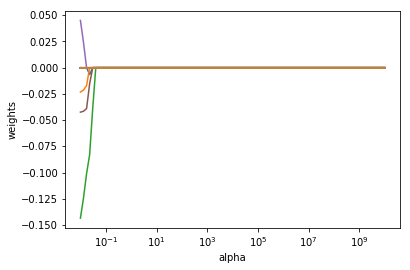

In [223]:
#find the optimal alpha value for the model
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train2), y_train2)
    coefs.append(lasso.coef_)
    
#Graph showing coef. change as alpha change, goal is to minimize coef. but zero alpha means the model is OLS model
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

In [224]:
#optimal alpha value using mininum cross validation variablitiy
lassocv = LassoCV(alphas = None, cv = 5, max_iter = 100000, normalize = True)
lassocv.fit(X_train2, y_train2)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train2, y_train2)
print(lassocv.alpha_)
mean_squared_error(y, lasso.predict(X))

6.14289791715e-05


0.011450031776240708

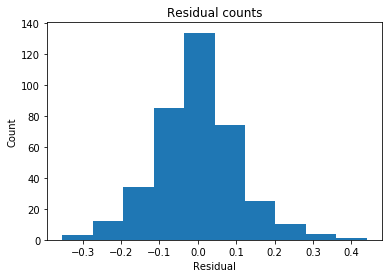

In [252]:
# Extract predicted values.
predicted = lass.predict(X).ravel()
actual = y

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

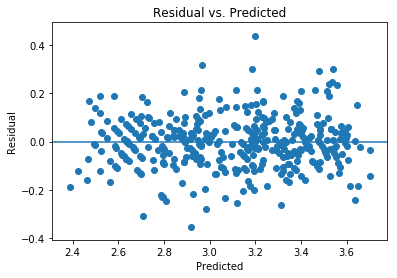

0.793237682034


In [253]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()
print(max(residual)-min(residual))

# ridge regression

In [258]:
#ridge regression with no set intercept because the whole equation will increase by some constant off true value
ridgeregr = Ridge(alpha=0.008737642000038414, fit_intercept=False, normalize = True)
ridgeregr.fit(X_train2, y_train2)
print(ridgeregr.score(X_test2, y_test2))
print('Cross Validation')
origparams = np.append(ridgeregr.coef_, ridgeregr.intercept_)
print('\nParameter estimates for the model with few features:')
print(str(origparams) + '\n')
k = cross_val_score(ridgeregr, X, y, cv=5)
k.sort()
print(np.mean(k))
k

0.891301365603
Cross Validation

Parameter estimates for the model with few features:
[-2.40242382 -0.31499678 -0.48950655 -0.01482667  0.02949201  2.42351066
  1.99100544  0.91185479  0.20774348  1.00070233  1.04578234  1.06411903
  0.        ]

0.895206782555


array([ 0.87590861,  0.89017263,  0.89468374,  0.90135248,  0.91391645])

In [259]:
max(k) -min(k)

0.038007839302772739

In [260]:
#Finding optimal alpha value
alphas = 10**np.linspace(10,-2,100)*0.5
alphas
coefs = []

for a in alphas:
    ridgeregr.set_params(alpha = a)
    ridgeregr.fit(X_train2, y_train2)
    coefs.append(ridgeregr.coef_)
    

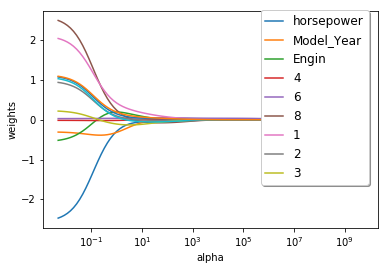

In [261]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(('horsepower', 'Model_Year','Engin',4,6,8,1,2,3),
           shadow=True, loc=(0.65, 0.2), handlelength=1.5, fontsize=12)
plt.show()

In [262]:
#optical alpha value by minimizing varibility of cross-validation result
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train2, y_train2)
ridgecv.alpha_

0.008737642000038414

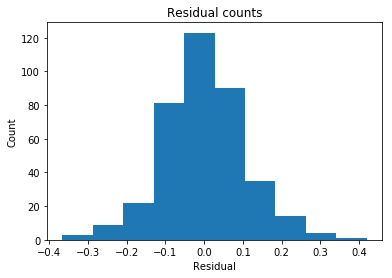

In [263]:
# Extract predicted values.
predicted = ridgeregr.predict(X).ravel()
actual = y

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

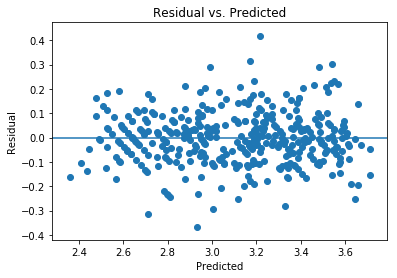

0.785359523762


In [264]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()
print(max(residual)-min(residual))

# SVM

In [265]:
#Support vector used mainly for classification and dataset with many feature (>10^6)
#Its in the mix to see what it can do and how does it compare
svr = SVR()

svr.fit(X_train2, y_train2)
print(ridgeregr.score(X_test2, y_test2))
print('Cross Validation')
k = cross_val_score(ridgeregr, X, y, cv=5)
k.sort()
k

0.891244124348
Cross Validation


array([ 0.87552778,  0.89189949,  0.89429849,  0.90159767,  0.91396183])

In [266]:
max(k) -min(k)

0.038434053703432003

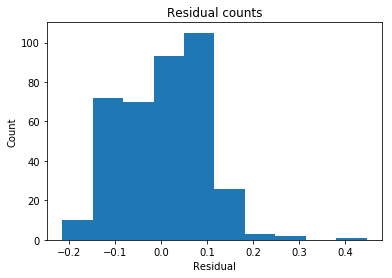

In [267]:
# Extract predicted values.
predicted = svr.predict(X).ravel()
actual = y

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

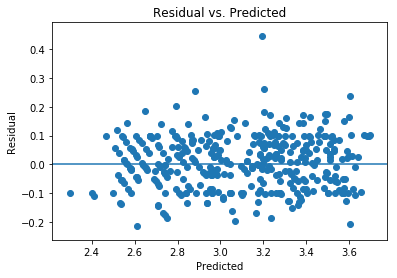

0.660862349743


In [268]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()
print(max(residual)-min(residual))

# End of model

4    199
8    103
6     83
3      4
5      3
Name: Cylinders, dtype: int64


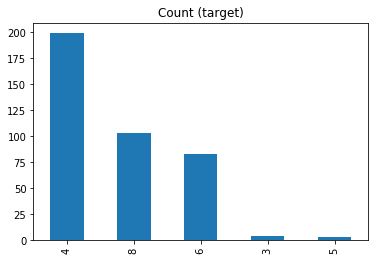

In [33]:
#Graph to illistrate the insuffecent data point for certin input variable
target_count = auto_mpg_df.Cylinders.value_counts()

print(target_count)
#print('Class 1:', target_count[1])
#print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');
plt.savefig('autompg_cylinder_count.png', bbox_inches='tight')
plt.show() 

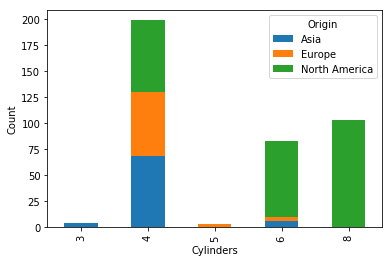

In [60]:
#Graph to illistrate fix for the insuffecent data point for certin input variable
auto_mpg_df2.groupby(['Cylinders', 'Origin'])['MPG'].size().unstack().plot(kind='bar', stacked=True)
plt.ylabel('Count')
plt.savefig('autompg_cylinder_count.png', bbox_inches='tight')
plt.show()

4    199
8    103
6     83
Name: Cylinders, dtype: int64


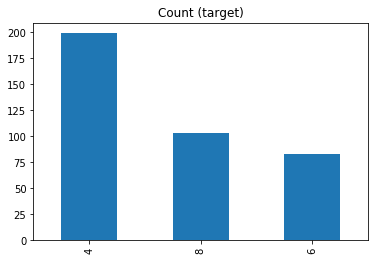

In [36]:
target_count = auto_mpg_df.Cylinders.value_counts()

print(target_count)
#print('Class 1:', target_count[1])
#print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');
plt.show()

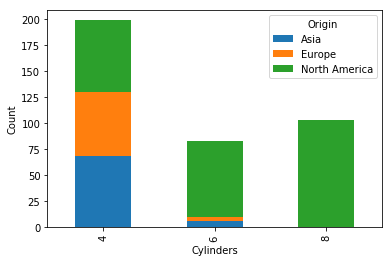

In [69]:
auto_mpg_df2.groupby(['Cylinders', 'Origin'])['MPG'].size().unstack().plot(kind='bar', stacked=True)
plt.ylabel('Count')
plt.savefig('autompg_cylinder_count2.png', bbox_inches='tight')
plt.show()

Hi @Kartse, thanks for asking about the capstone presentation system..

From your dashboard, go to Goals and you should see a Calendly link for scheduling time with a capstone review host.  This link is only available once you have completed all previous goals including a mock interview.

Provided all prior goals have been approved, you will see a Calendly to schedule a host and time that works for you, preferably with a few days notice.

After you select a time slot, come back to the Goals page and you will see a capstone submission form where you will enter a project URL, a title and a story/abstract.

URL: I like the URL to point to a directory in a Github repository. In this directory you may include:

1. project-name.ipynb (include URL to data)
2. project-name.pdf (PDF of slide deck)
3. If your data set is small and unique include it

Title: project name.

Story: say something about the problem you are trying to solve and what tools you used to do them with. Get creative or keep it dry. This is a chance to work on your presentation skills, including summarizing your project in a few sentences.

You may reference what part of the curriculum this capstone addresses (supervised learning, unsupervised learning, or final project).

Hitting the submit button will add an entry into the Workshops where folks may find your abstract/story and RSVP to join your talk.

A nice way to close the loop is to send the Workshop notice to your reviewer to signal that all's good to go and they can look over your code and be prepared to host. Typically, the more lead time you give your reviewer and potential audience, the more you will get out of the process.

Let me know if you have questions, happy to help!